In [18]:
orders = (
    df.groupby([
        "OrderID",
        "OrderDate",
        "CustomerID",
        "CustomerName",
        "Country",
        "State",
        "City",
        "PaymentMethod",
        "SellerID"
    ])
    .agg(
        TotalAmount_sum = ("TotalAmount", "sum"),
        ProductID_count = ("ProductID", "count")
    )
    .reset_index()
)

In [19]:
orders.head()

,OrderID,OrderDate,CustomerID,CustomerName,Country,State,City,PaymentMethod,SellerID,TotalAmount_sum,ProductID_count
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,India,DC,Washington,Debit Card,SELL01967,319.86,1
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,United States,TX,Fort Worth,Amazon Pay,SELL01298,259.64,1
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,United States,TX,Austin,Debit Card,SELL00908,108.06,1
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,India,NC,Charlotte,Cash on Delivery,SELL01164,159.66,1
4,ORD0000006,2022-12-31,CUST042705,Karan Sharma,United States,CA,Los Angeles,UPI,SELL01494,2017.53,1


In [20]:
orders['ProductID_count'].value_counts()

ProductID_count
1    74628
Name: count, dtype: int64

In [21]:
df.groupby('OrderID')['ProductID'].count()

OrderID
ORD0000001    1
ORD0000002    1
ORD0000003    1
ORD0000004    1
ORD0000006    1
             ..
ORD0099996    1
ORD0099997    1
ORD0099998    1
ORD0099999    1
ORD0100000    1
Name: ProductID, Length: 74628, dtype: int64

In [23]:
#df.sort_values(['CustomerID','OrderDate']).head(40)

In [24]:
table1 = df.groupby('Country').agg(
        TTL_Amount = ("TotalAmount", "sum"),
        Num_Products = ("ProductID", "count")
    ).sort_values(by='TTL_Amount',ascending=False)

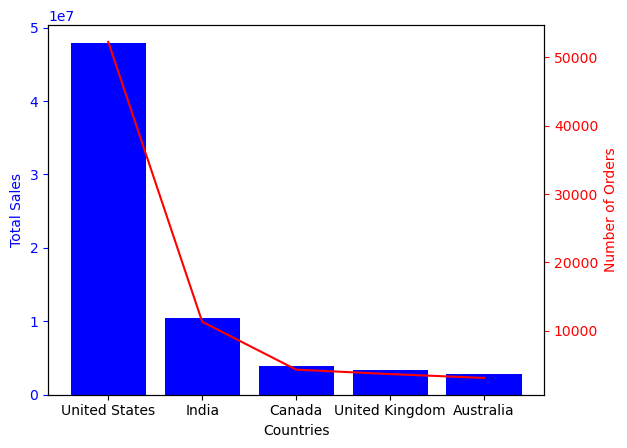

In [25]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
ax.bar(table1.index,table1['TTL_Amount'],color='blue')
ax.set_xlabel("Countries")
ax.set_ylabel("Total Sales",color='blue')
ax.tick_params("y",colors='blue')
ax2=ax.twinx()
ax2.plot(table1.index,table1['Num_Products'],color='red')
ax2.set_ylabel("Number of Orders",color='red')
ax2.tick_params("y",colors='red')
plt.show()

In [26]:
fig.savefig('table1.png')

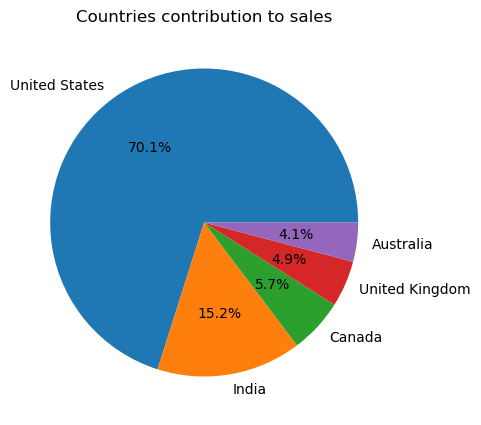

In [27]:
fig,ax=plt.subplots(figsize=(5,5))
ax.set_title("Countries contribution to sales")
ax.pie(table1['TTL_Amount'], labels=table1.index,  autopct='%1.1f%%')
plt.show() 
fig.savefig('country_sales.png')

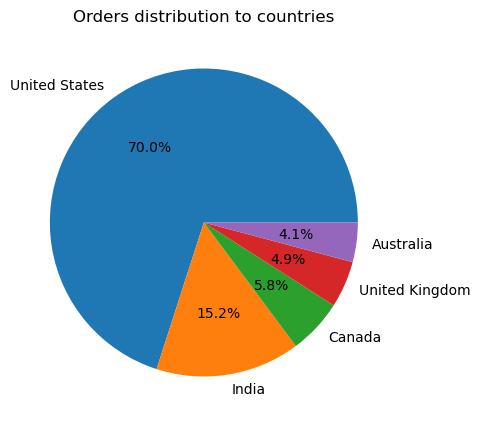

In [28]:
fig1,ax=plt.subplots(figsize=(5,5))
ax.set_title("Orders distribution to countries")
ax.pie(table1['Num_Products'], labels=table1.index,  autopct='%1.1f%%')
plt.show() 
fig1.savefig('country_orders.png')

In [29]:
USA_states = df[df['Country']=='United States'].groupby('State').agg(
        TTL_Amount = ("TotalAmount", "sum"),
        Num_Products = ("ProductID", "count")
    ).sort_values('TTL_Amount',ascending=False)

In [30]:
USA_states

,TTL_Amount,Num_Products
State,,
TX,11925125.12,12981
CA,9498660.37,10414
NC,2513192.14,2725
PA,2460878.07,2653
FL,2444255.84,2692
WA,2412487.60,2618
IL,2407529.68,2592
CO,2393305.10,2577
NY,2390194.87,2605


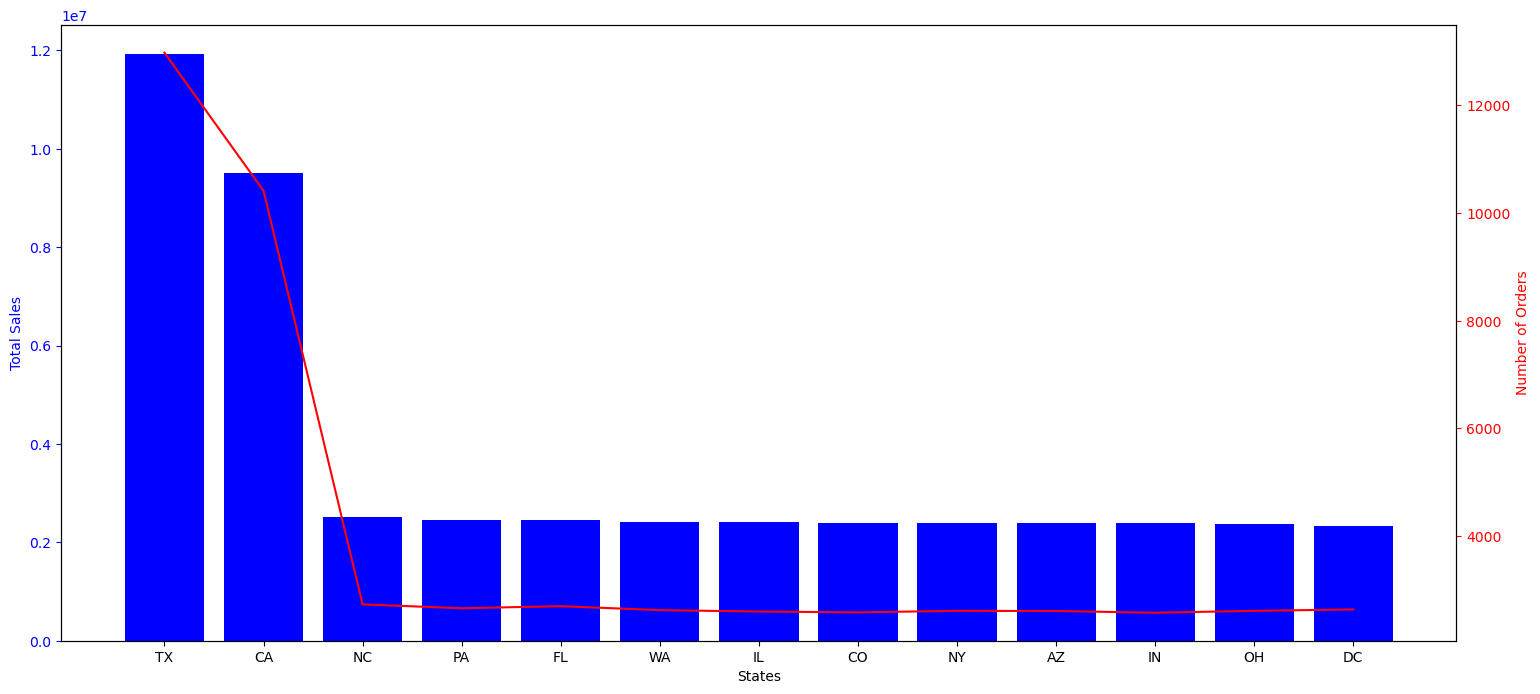

In [31]:
fig2,ax=plt.subplots(figsize=(18,8))
ax.bar(USA_states.index,USA_states['TTL_Amount'],color='blue')
ax.set_xlabel("States")
ax.set_ylabel("Total Sales",color='blue')
ax.tick_params("y",colors='blue')
ax2=ax.twinx()
ax2.plot(USA_states.index,USA_states['Num_Products'],color='red')
ax2.set_ylabel("Number of Orders",color='red')
ax2.tick_params("y",colors='red')
plt.show()

fig2.savefig('State_orders.png')

In [32]:
categories = df.groupby('Category').agg(
        TTL_Amount = ("TotalAmount", "sum"),
        Num_Orders = ("OrderID", "count")
    ).sort_values(by='TTL_Amount',ascending=False)

In [33]:
categories

,TTL_Amount,Num_Orders
Category,,
Electronics,11661931.08,12618
Sports & Outdoors,11492563.91,12568
Books,11369625.12,12536
Clothing,11339890.29,12296
Toys & Games,11261919.15,12280
Home & Kitchen,11246747.55,12330


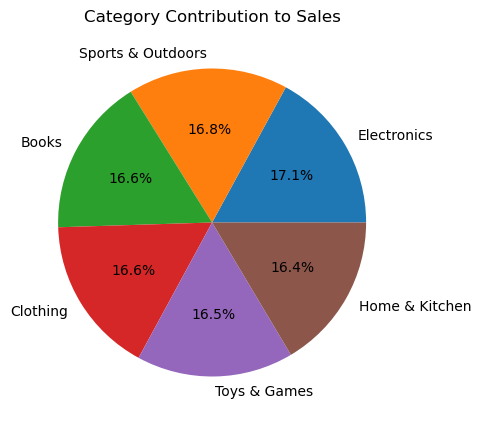

In [34]:
fig3,ax=plt.subplots(figsize=(5,5))
ax.set_title("Category Contribution to Sales")
ax.pie(categories['TTL_Amount'], labels=categories.index,  autopct='%1.1f%%')
plt.show() 
fig3.savefig('Category_sales.png')

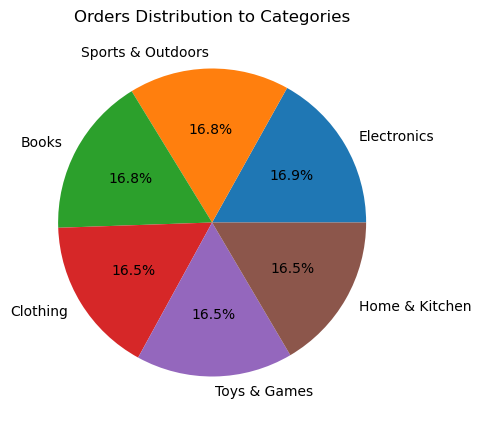

In [35]:
fig4,ax=plt.subplots(figsize=(5,5))
ax.set_title("Orders Distribution to Categories")
ax.pie(categories['Num_Orders'], labels=categories.index,  autopct='%1.1f%%')
plt.show() 
fig4.savefig('Category_orders.png')

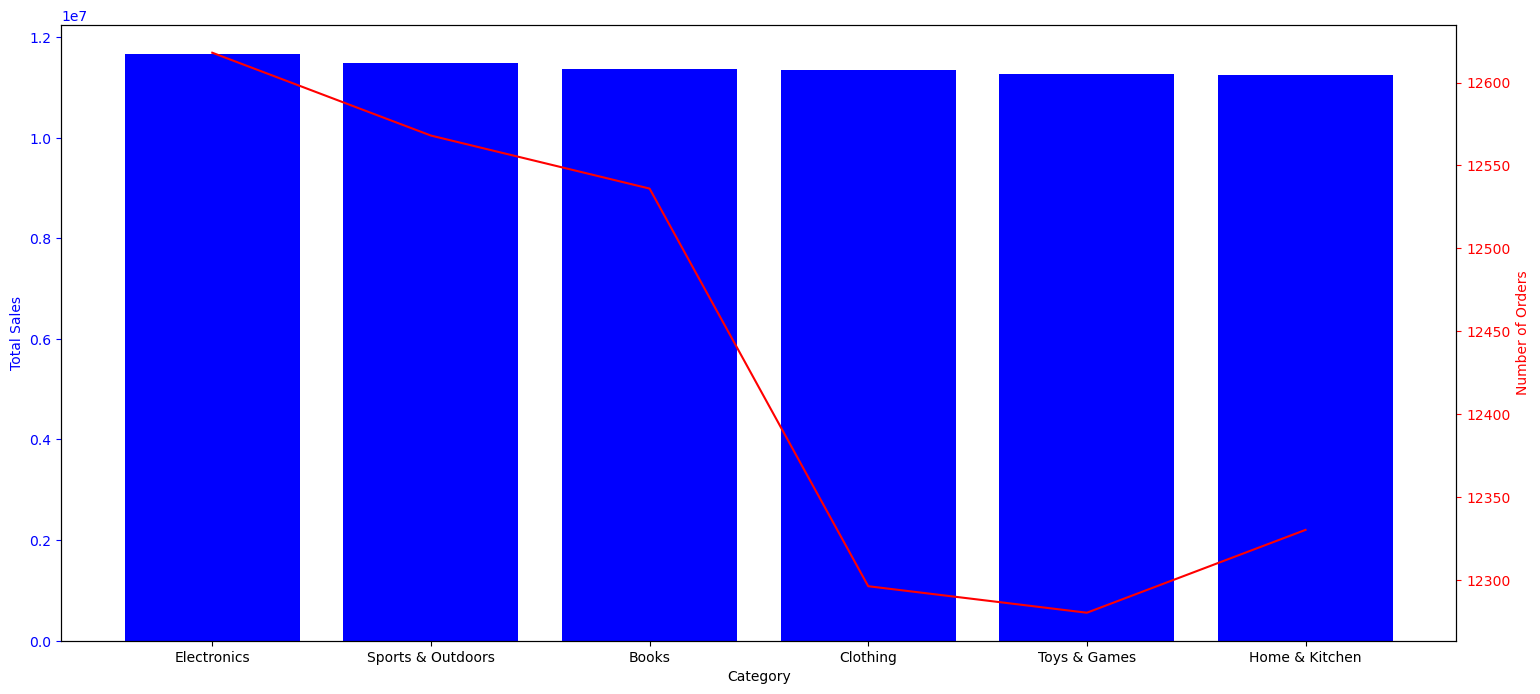

In [36]:
fig5,ax=plt.subplots(figsize=(18,8))
ax.bar(categories.index,categories['TTL_Amount'],color='blue')
ax.set_xlabel("Category")
ax.set_ylabel("Total Sales",color='blue')
ax.tick_params("y",colors='blue')
ax2=ax.twinx()
ax2.plot(categories.index,categories['Num_Orders'],color='red')
ax2.set_ylabel("Number of Orders",color='red')
ax2.tick_params("y",colors='red')
plt.show()

fig5.savefig('Category_sales_orders.png')

In [37]:
df.groupby(['Country','Category']).agg(
     sum_of_sales=('TotalAmount', 'sum'),
     Count_of_orders=('OrderID', 'count')
).sort_values(by='sum_of_sales',ascending=False)

sum_of_sales  Count_of_orders
Country        Category                                        
United States  Electronics          8152549.87             8788
               Sports & Outdoors    8040960.13             8761
               Home & Kitchen       7938254.15             8664
               Clothing             7937903.41             8594
               Books                7935833.62             8792
               Toys & Games         7929604.75             8666
India          Electronics          1782900.14             1955
               Sports & Outdoors    1779809.27             1949
               Books                1723626.47             1871
               Toys & Games         1721545.50             1838
               Clothing             1696016.12             1879
               Home & Kitchen       1679565.52             1818
Canada         Home & Kitchen        676144.66              752
               Electronics           663330.19              701
               Books                 653576.09              734
               Clothing              647883.22              686
               Sports & Outdoors     646807.09              731
               Toys & Games          637193.42              702
United Kingdom Clothing              579295.45              613
               Electronics           572338.48              640
               Sports & Outdoors     559743.06              614
               Books                 541695.96              590
               Home & Kitchen        534841.29              622
               Toys & Games          528316.21              575
Australia      Books                 514892.98              549
               Electronics           490812.40              534
               Clothing              478792.09              524
               Sports & Outdoors     465244.36              513
               Toys & Games          445259.27              499
               Home & Kitchen        417941.93              474